Image Enhancements

Image Processing techniques take advantage of mathematical operations to achieve different results. Most often we arrive at an enhanced version of the image using some basic operations. We will take a look at some of the fundamental operations often used in computer vision pipelines. In this notebook we will cover:

In [1]:
#Arithmetic Operations like addition, multiplication
#Thresholding & Masking
#Bitwise Operations like OR, AND, XOR

In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from IPython.display import Image
%matplotlib inline

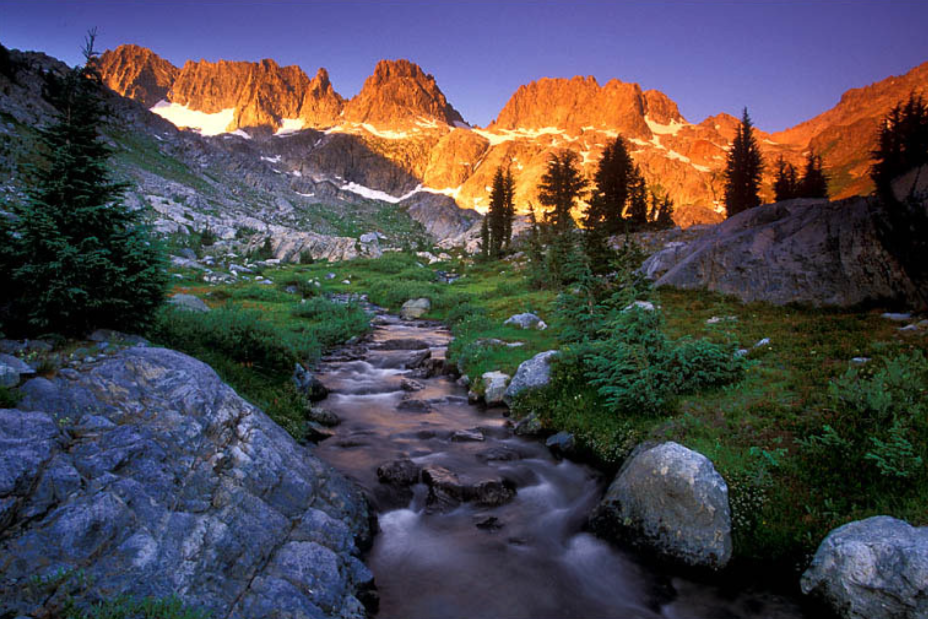

In [3]:
#Original Image
LandscapeBGR = cv2.imread("LandscapeImg.png", cv2.IMREAD_COLOR)  #Or, use 1 to get Colored Image
LandscapeRGB = cv2.cvtColor(LandscapeBGR, cv2.COLOR_BGR2RGB)

Image(filename = "LandscapeImg.png")

Addition Or Brightness

Text(0.5, 1.0, 'Brighter')

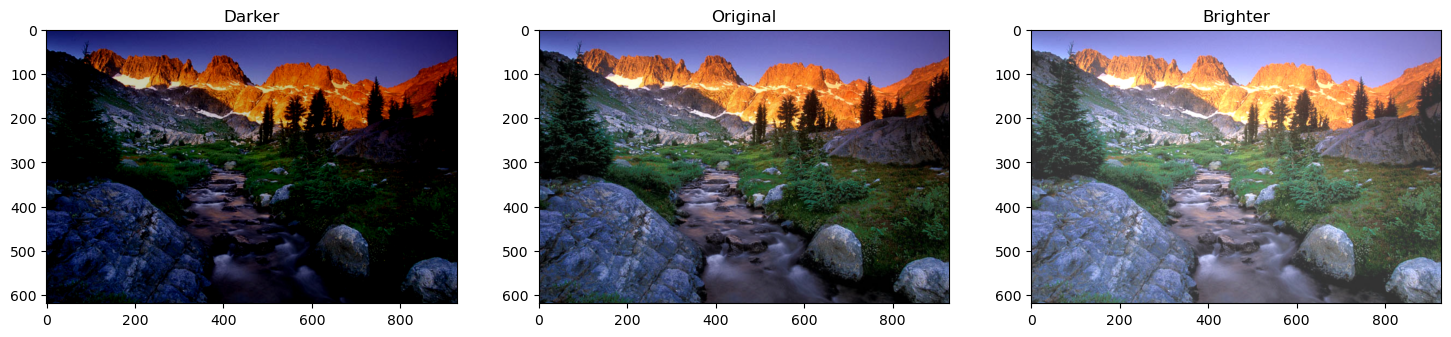

In [4]:
matrix = np.ones(LandscapeRGB.shape, dtype = "uint8") * 50

#Addition Can Result in Brightness Change(UP) & Subtract Can Result in Brightness Change(DOWN)
LandscapeRGB_brighter = cv2.add(LandscapeRGB, matrix)
LandscapeRGB_darker = cv2.subtract(LandscapeRGB, matrix)

#Show The Images
plt.figure(figsize = (18, 5))

plt.subplot(131)
plt.imshow(LandscapeRGB_darker)
plt.title("Darker")

plt.subplot(132)
plt.imshow(LandscapeRGB)
plt.title("Original")

plt.subplot(133)
plt.imshow(LandscapeRGB_brighter)
plt.title("Brighter")


Mutiplication Or Contrast

Text(0.5, 1.0, 'Higher Contrast')

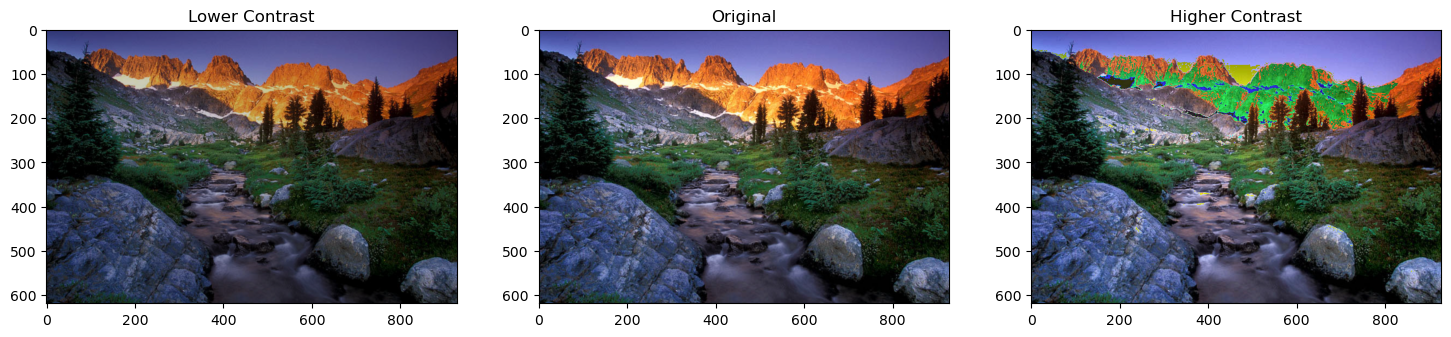

In [5]:
matrix1 = np.ones(LandscapeRGB.shape) * 0.8
matrix2 = np.ones(LandscapeRGB.shape) * 1.2

#Multiplication Can Result Improving The Contrast of The Image
LandscapeRGB_brighter = np.uint8(cv2.multiply(np.float64(LandscapeRGB), matrix2))
LandscapeRGB_darker = np.uint8(cv2.multiply(np.float64(LandscapeRGB), matrix1))

#Show The Images
plt.figure(figsize = (18, 5))

plt.subplot(131)
plt.imshow(LandscapeRGB_darker)
plt.title("Lower Contrast")

plt.subplot(132)
plt.imshow(LandscapeRGB)
plt.title("Original")

plt.subplot(133)
plt.imshow(LandscapeRGB_brighter)
plt.title("Higher Contrast")

Handling Overflow Using np.clip

Text(0.5, 1.0, 'Higher Contrast')

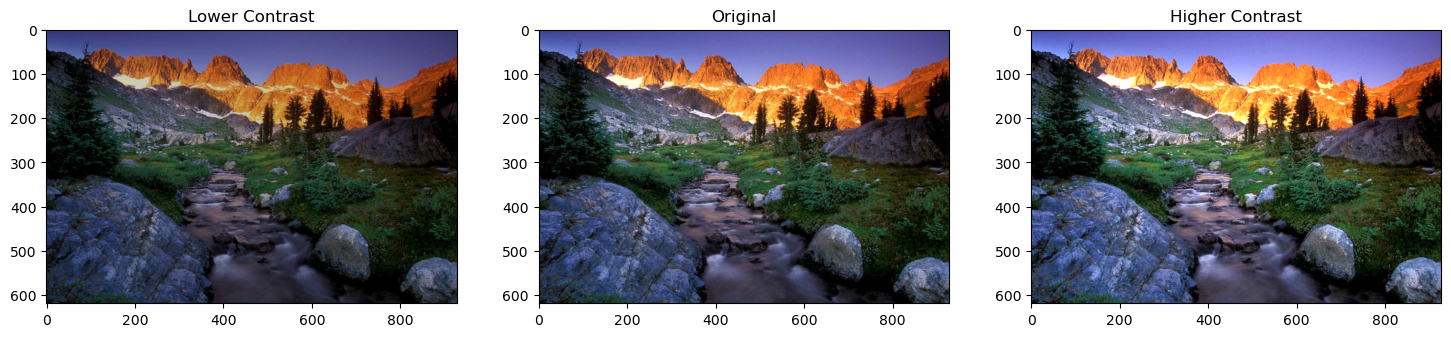

In [6]:
matrix1 = np.ones(LandscapeRGB.shape) * 0.8
matrix2 = np.ones(LandscapeRGB.shape) * 1.2

#Multiplication Can Result Improving The Contrast of The Image
LandscapeRGB_lower = np.uint8(cv2.multiply(np.float64(LandscapeRGB), matrix1))
LandscapeRGB_higher = np.uint8(np.clip(cv2.multiply(np.float64(LandscapeRGB), matrix2), 0, 255))


#Show The Images
plt.figure(figsize = (18, 5))

plt.subplot(131)
plt.imshow(LandscapeRGB_lower)
plt.title("Lower Contrast")

plt.subplot(132)
plt.imshow(LandscapeRGB)
plt.title("Original")

plt.subplot(133)
plt.imshow(LandscapeRGB_higher)
plt.title("Higher Contrast")

Image Thresholding

Rapid Use Cases in Image Processing. One of that is creating Image Mask. Image Mask allow us to process on specific part of the image keeping the other parts intact. Image Thresholding is used to create Binary images from Grayscale images. We can use different thresholds to create different binary images from the same original image. 

This Function takes 4

In [7]:
#Function Syntax -- > retval, dst = cv2.threshold(src, thres, maxval, type)

In [8]:
#1. src: Input Array(Multiple Channel)
#2. thres: Threshold Value
#3. maxval: Maximum Value to use The THRES_BINARY and THRES_BINARY_INV Thressholding Types
#4. type: Thresholding Type 

Adaptive Threshold Function Takes 6 Required arguments

In [9]:
#Function Syntax -- > dst = cv2.adaptiveThreshold(src, maxval, adaptiveMethod, thresholdType, blockSize, c)

In [10]:
#1. src: Source 8 bit Single Channel Type
#2. maxval: Non Zero Value Assigned to the Pixels for Which THe Condition is Satisfied
#3. adaptiveMethod: Adaptive Thresholding Algorithm to use, See Adaptive Thresholding Types.
#The BORDER_REPLICATE|BORDER_ISOLATED is udes to Process Boundaries
#4. thresholdType: Thresholding Type that must be either THRES_BINARY and THRES_BINARY_INV Thressholding Types
#5. blockSize: Size of a Pixel Neigbourhood that is used to calculate a threshold value for the PIxel 3,5,7 and so on
#6. c: Contstant Subtracted from the mean or weighted mean. Normally it is Positive bur Maybe Zero or Negative as well.

Threshholded Image Shape : (2041, 3072)


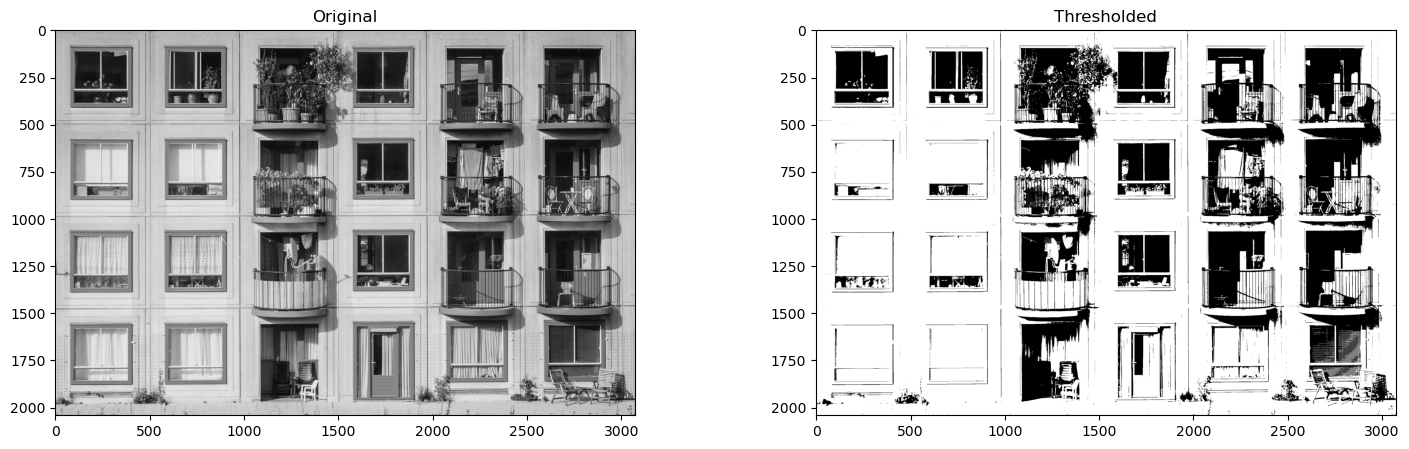

In [11]:
BuildingImage = cv2.imread("Buildingwindows.jpg", cv2.IMREAD_GRAYSCALE) #Or use 0 to Get Grayscale Image
retval, img_thresh = cv2.threshold(BuildingImage, 100, 255, cv2.THRESH_BINARY)

#Show The Images
plt.figure(figsize = (18, 5))

plt.subplot(121)
plt.imshow(BuildingImage, cmap = 'gray')
plt.title("Original")

plt.subplot(122)
plt.imshow(img_thresh, cmap = 'gray')
plt.title("Thresholded")

print("Threshholded Image Shape :", img_thresh.shape)

Application - Sheet Music Reader

Suppose you wanted to build an application that could read (Decode) sheet music. This is similar to Optical Character Recognition (OCR) for text documents, where the goal is to recognize text characters. In either application, One of the first steps in processing pipeline is to isolate the important information in the iamge of a document (Seperating it from the Background). This task can be accomplished with thresholding techniques.

Text(0.5, 1.0, 'Thresholded (Adaptive)')

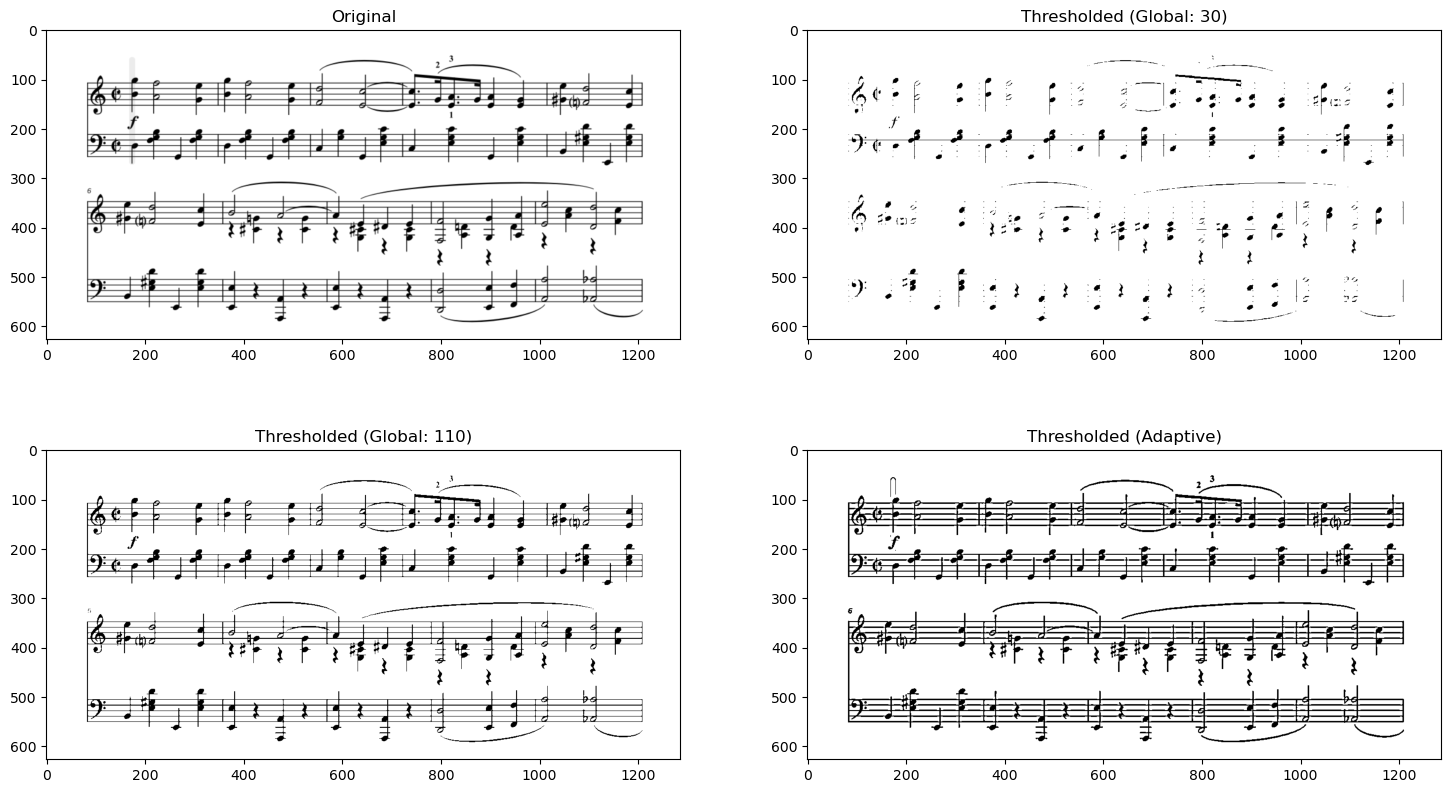

In [12]:
#Read The Original Image
MusicReaderImg = cv2.imread("MusicReader.png", cv2.IMREAD_GRAYSCALE) #Or use 0 to Get Grayscale Image

#Perform Global Thresholding
retval, img_thresh_global_1 = cv2.threshold(MusicReaderImg, 30, 255, cv2.THRESH_BINARY)

#Perform Global Thresholding
retval, img_thresh_global_2 = cv2.threshold(MusicReaderImg, 110, 255, cv2.THRESH_BINARY)

#Perform Adaptive Thresholding
img_thresh_adptv = cv2.adaptiveThreshold(MusicReaderImg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)


#Show The Images
plt.figure(figsize = (18, 10))

plt.subplot(221)
plt.imshow(MusicReaderImg, cmap = 'gray')
plt.title("Original")

plt.subplot(222)
plt.imshow(img_thresh_global_1, cmap = 'gray')
plt.title("Thresholded (Global: 30)")

plt.subplot(223)
plt.imshow(img_thresh_global_2, cmap = 'gray')
plt.title("Thresholded (Global: 110)")

plt.subplot(224)
plt.imshow(img_thresh_adptv, cmap = 'gray')
plt.title("Thresholded (Adaptive)")

Bitwise Operations

In [13]:
#Example API 
#cv2.bitwise_and()
#cv2.bitwise_or()
#cv2.bitwise_xor()
#cv2.bitwise_not()

In [14]:
#Function Syntax -- > dst = cv2.bitwise_and(src1, src2)

This Function Takes 2 Required arguments

In [15]:
#1. src1: First Input Array or Scaler
#1. src2: Second Input Array or Scaler

Another Important Optional argument

In [16]:
#1. mask: Optional Operation Mask. 8 bit SIngle Channel Array, that Specifies elements of the Output Array to be changed.

Rectangle Image Shape : (337, 844)
Circle Image Shape : (337, 844)


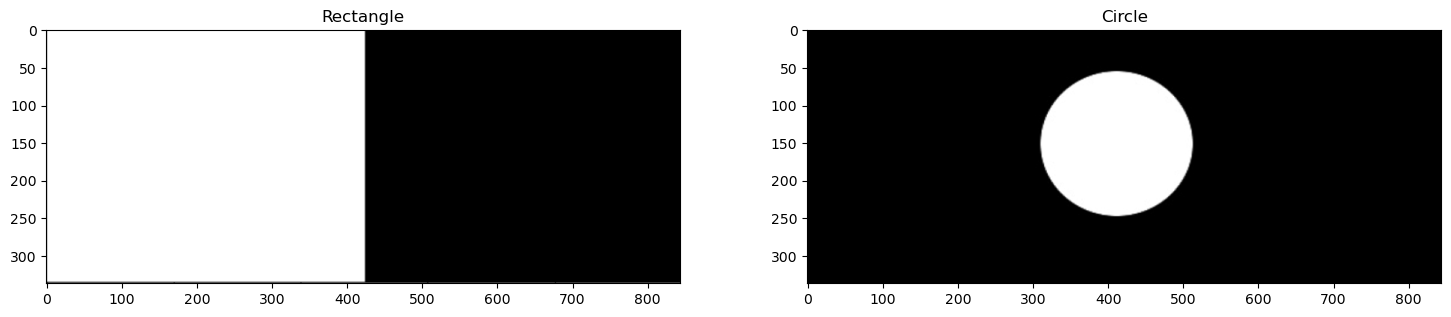

In [17]:
#Read Images
RectangleImage = cv2.imread("Rectangle.png", cv2.IMREAD_GRAYSCALE) #Or use 0 to Get Grayscale Image
CircleImage = cv2.imread("Circle.png", cv2.IMREAD_GRAYSCALE) #Or use 0 to Get Grayscale Image

#Show The Images
plt.figure(figsize = (18, 10))

plt.subplot(221)
plt.imshow(RectangleImage, cmap = 'gray')
plt.title("Rectangle")

plt.subplot(222)
plt.imshow(CircleImage, cmap = 'gray')
plt.title("Circle")

print("Rectangle Image Shape :", RectangleImage.shape)
print("Circle Image Shape :", CircleImage.shape)

Bitwise AND Operator

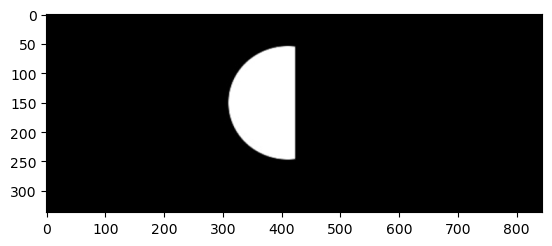

In [18]:
#This Operation won't Work if Both Image Shape isn't Same

result = cv2.bitwise_and(RectangleImage, CircleImage, mask = None)
plt.imshow(result, cmap = 'gray')

Bitwise OR Operator

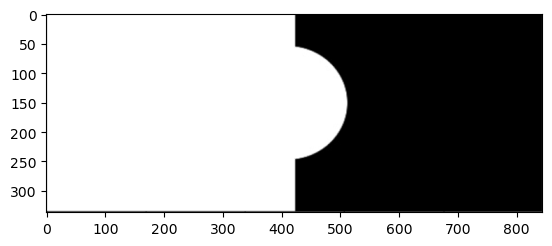

In [19]:
#This Operation won't Work if Both Image Shape isn't Same

result = cv2.bitwise_or(RectangleImage, CircleImage, mask = None)
plt.imshow(result, cmap = 'gray')

Bitwise XOR Operator

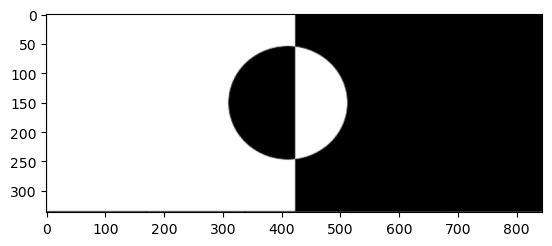

In [20]:
#This Operation won't Work if Both Image Shape isn't Same

result = cv2.bitwise_xor(RectangleImage, CircleImage, mask = None)
plt.imshow(result, cmap = 'gray')

Application - Logo Manipulation

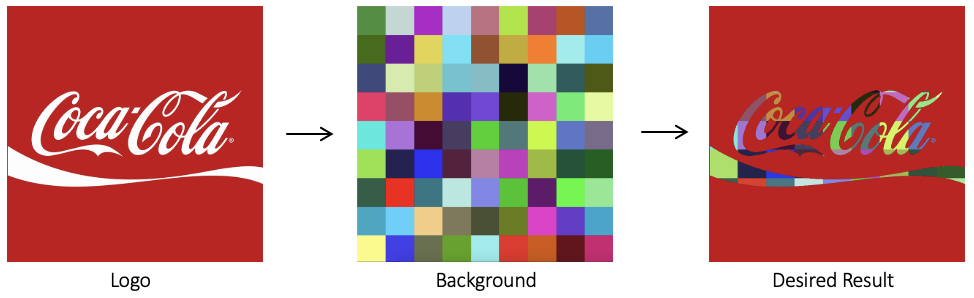

In [21]:
#Example of Logo Manipulation
Image(filename = "LogoManipulation.png")

Shape of This Image : (463, 463, 3)


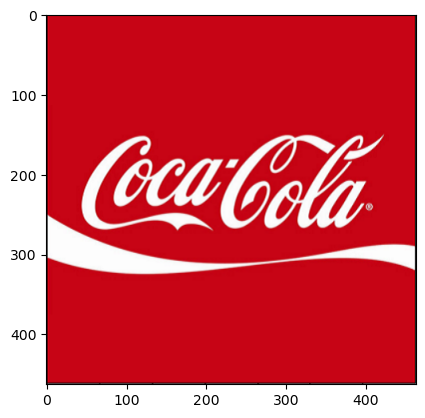

In [22]:
#Read Foreground Image. This is The Image we're Going to Blend With Background Image
CocaColaBGR = cv2.imread("CocaCola.png")
CocaColaRGB = cv2.cvtColor(CocaColaBGR, cv2.COLOR_BGR2RGB)
plt.imshow(CocaColaRGB)

print("Shape of This Image :", CocaColaRGB.shape)

In [23]:
CocaColaRGB_width = CocaColaRGB.shape[0] #0 is the Shape of Width of The Image
CocaColaRGB_height = CocaColaRGB.shape[1] #1 is the Shape of Height of The Image

SHape of This Image : (463, 463, 3)


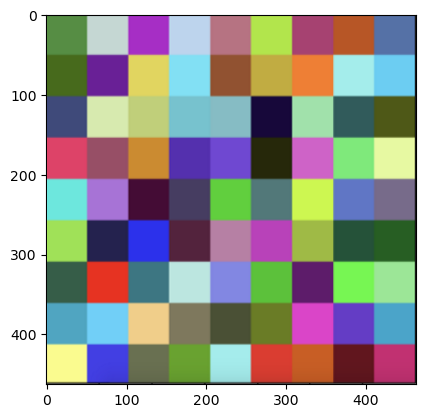

In [24]:
#Read Background Image
backgroundBGR = cv2.imread("ManipulatingBG.png")
backgroundRGB = cv2.cvtColor(backgroundBGR, cv2.COLOR_BGR2RGB)
plt.imshow(backgroundRGB)

print("SHape of This Image :", backgroundRGB.shape)

In [25]:
backgroundRGB_width = backgroundRGB.shape[0] #0 is the Shape of Width of The Image
backgroundRGB_height = backgroundRGB.shape[1] #1 is the Shape of Height of The Image

In [26]:
#Set Desired Width (CocaColaImage_width) and Maintain Image Aspect Ratio
aspect_ratio = CocaColaRGB_width / backgroundRGB.shape[1]
dimension = (CocaColaRGB_width, int(backgroundRGB.shape[0] * aspect_ratio))

#Resize Background Image to Same Size as Logo Image
#backgroundRGB = cv2.resize(backgroundRGB, dimension, interpolation = cv2.INTER_AREA)

Masked Image Shape : (463, 463)


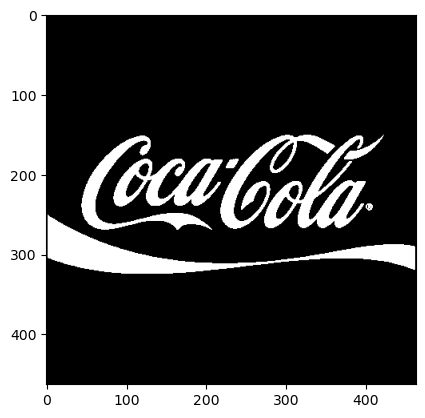

In [27]:
#Create Mask For Original Image
CocaCola_grey = cv2.cvtColor(CocaColaRGB, cv2.COLOR_RGB2GRAY) #Making Coca Cola (Foreground) Image Colored to Grey

#Apply Global Thresholding to Create a Binary Mask of the Logo
retval, CocaCola_mask = cv2.threshold(CocaCola_grey, 127, 255, cv2.THRESH_BINARY)

plt.imshow(CocaCola_mask, cmap = 'gray')
print("Masked Image Shape :", CocaCola_mask.shape)

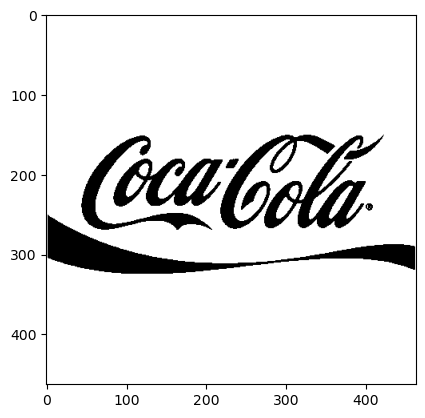

In [28]:
#Invert The Mask
CocaCola_mask_invrt = cv2.bitwise_not(CocaCola_mask)
plt.imshow(CocaCola_mask_invrt, cmap = 'gray')

In [29]:
print(CocaColaRGB.shape)
print(backgroundRGB.shape)

(463, 463, 3)
(463, 463, 3)


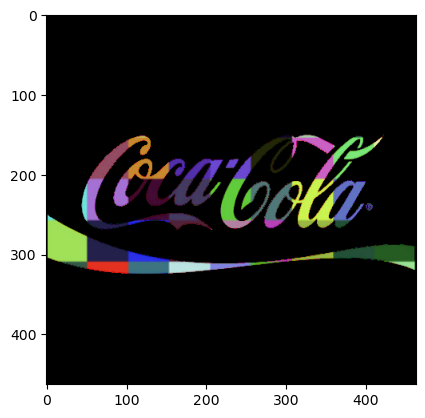

In [30]:
#Apply Background On the Mask
#where backgroundRGB is The first input image on which bitwise and operation is to be performed
#where CocaColaRGB is The second input image on which bitwise and operation is to be performed

manipulationBG = cv2.bitwise_and(backgroundRGB, CocaColaRGB, mask = CocaCola_mask)
plt.imshow(manipulationBG)

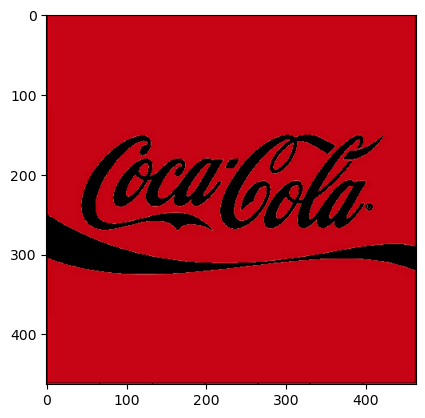

In [31]:
#Isolate foreground (red from original image) using the inverse mask
img_foreground = cv2.bitwise_and(CocaColaRGB, CocaColaRGB, mask=CocaCola_mask_invrt)
plt.imshow(img_foreground)

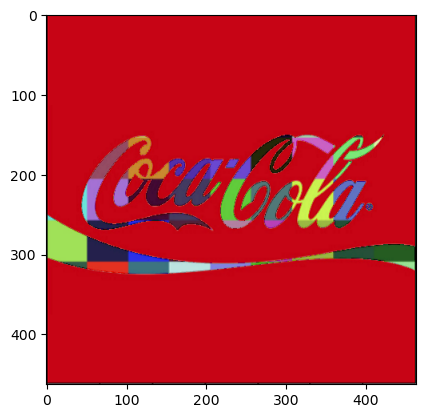

In [32]:
#Merge Foreground and Background
resultImage = cv2.add(manipulationBG, img_foreground)
plt.imshow(resultImage)

In [33]:
cv2.imwrite("FinalImage.png", resultImage[:, :, ::-1])

True